In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os

In [2]:
data = pd.read_csv('../data/BITC.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-21,25.830000,26.770000,25.790001,26.711000,26.711000,4500
1,2023-06-22,26.910000,26.910000,26.260000,26.716000,26.716000,1100
2,2023-06-23,26.669001,27.684999,26.669001,27.443001,27.443001,3400
3,2023-06-26,26.969999,26.969999,26.673000,26.809999,26.809999,2800
4,2023-06-27,27.150000,27.389000,27.000000,27.159000,27.159000,9600


## Columns Description

Open - The price at which the financial security opens in the market when trading begins.

High- The highest price at which a stock traded during a period.

Low- The minimum price of a stock in a period.

Close- The last price at which a stock trades during a regular trading session.

Adj close- The closing price after dividend payouts, stock splits, or the issue of additional shares (adjustments) have been taken into account.

Volume- The number of shares traded in a stock or contracts traded in futures or options.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,36.251333,36.599454,35.760399,36.173130,36.173130,7191.438735
std,11.263601,11.430604,10.934521,11.153384,11.153384,10076.099927
min,21.452000,21.452000,21.452000,21.452000,21.452000,100.000000
25%,25.934999,26.027000,25.790001,26.027000,26.027000,1200.000000
50%,33.509998,33.880001,33.220001,33.564999,33.564999,3400.000000
75%,48.480000,49.049999,47.820000,48.571999,48.571999,8600.000000
max,57.279999,57.540001,56.707001,57.540001,57.540001,78700.000000


### Data distribution of volume

Text(0.5, 1.0, 'Volume of stock versus time')

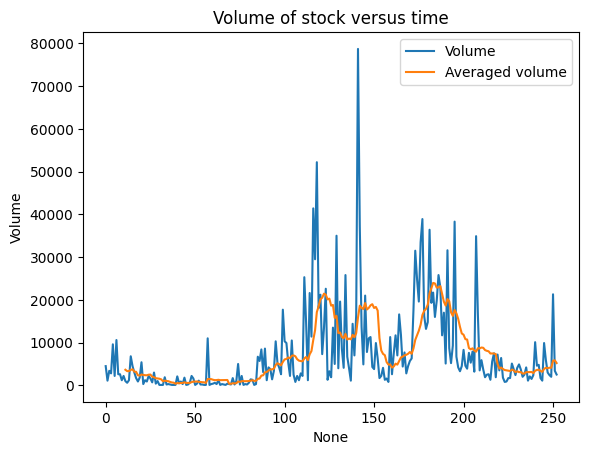

In [6]:
# Plotting data distribution of the volume

sns.lineplot(x=data.index,y=data['Volume'],label='Volume')
sns.lineplot(x=data.index,y=data['Volume'].rolling(window=12).mean(),label='Averaged volume')
plt.title('Volume of stock versus time')

In [7]:
data['Date'] = pd.to_datetime(data['Date'])

## Candlestick chart

In [8]:
import mplfinance as mpf

In [9]:
data.set_index('Date', inplace=True)

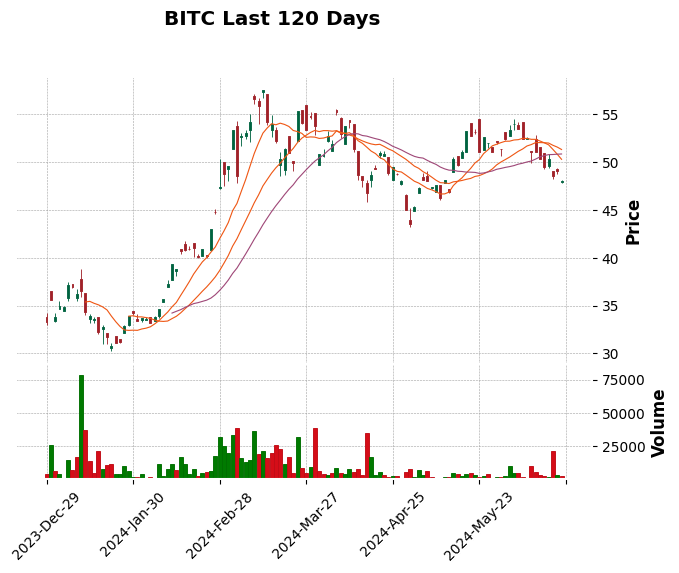

In [18]:
mpf.plot(data.tail(120), 
        type='candle', style='charles', 
        volume=True, 
        title='BITC Last 120 Days', 
        mav=(10,20,30))

- The cryptocurrency experienced a peak followed by a downward trend over the last 120 days.
- The short-term and medium-term moving averages crossing below the 50-day SMA indicates a bearish outlook.
- The price is facing resistance around 55 and has some support around the 45-50 range.
- Recent high trading volumes, especially on down days, suggest selling pressure is strong.

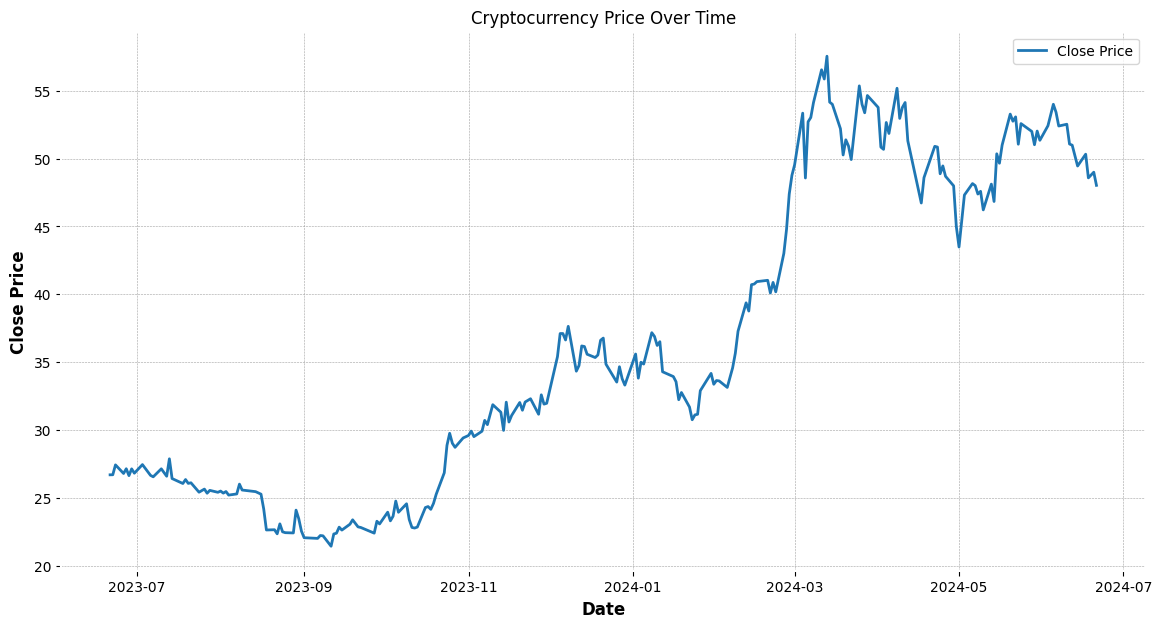

In [11]:
plt.figure(figsize=(14, 7))
plt.title("Cryptocurrency Price Over Time")
plt.plot(data['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

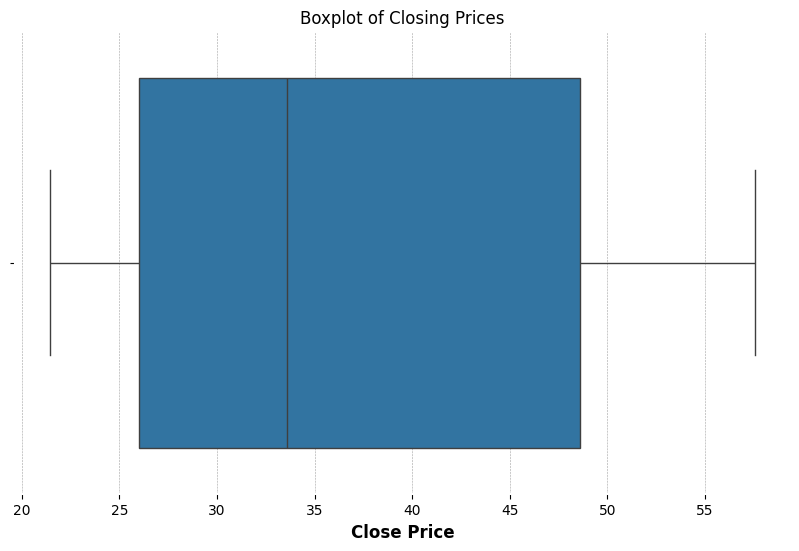

In [12]:
# Boxplot for detecting outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Close'])
plt.title('Boxplot of Closing Prices')
plt.xlabel('Close Price')
plt.show()

## Moving Averages

In [13]:
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

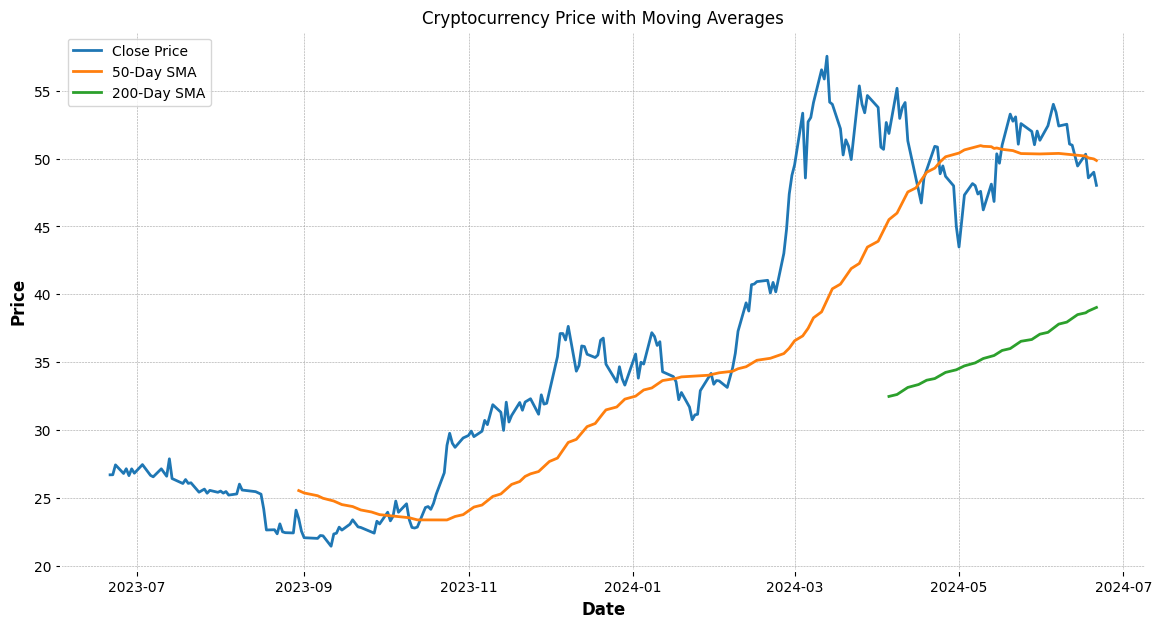

In [14]:
plt.figure(figsize=(14, 7))
plt.title("Cryptocurrency Price with Moving Averages")
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA_50'], label='50-Day SMA')
plt.plot(data['SMA_200'], label='200-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### 50-Day SMA
Average closing price over the previous 50 days
It gives a realistic and effective trend indicator
### 200-Day SMA
Average closing price over the previous 200 days
It is considered a key indicator by traders and market analysts for determining overall long-term market trends.

### Trends
The prices showed a slight decline around August-September 2023, then had a significant upward trend starting from around November 2023, indicating a strong bullish phase.